# Diversificación y fuentes de riesgo en un portafolio  - Una ilustración con mercados internacionales.

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/5/5f/Map_International_Markets.jpg" width="500px" height="300px" />

> Entonces, la clase pasada vimos cómo afecta la correlación entre pares de activos en un portafolio. Dijimos que como un par de activos nunca tienen correlación perfecta, al combinarlos en un portafolio siempre conseguimos diversificación del riesgo.

> Vimos también que no todo el riesgo se puede diversificar. Dos fuentes de riesgo:
> - Sistemático: afecta de igual manera a todos los activos. No se puede diversificar.
> - Idiosincrático: afecta a cada activo en particular por razones específicas. Se puede diversificar.

En esta clase veremos un ejemplo de diversificación en un portafolio, usando datos de mercados de activos internacionales.

En el camino, definiremos términos como *frontera de mínima varianza*, *portafolio de mínima varianza* y *portafolios eficientes*, los cuales son básicos para la construcción de la **teoría moderna de portafolios**.

Estos portafolios los aprenderemos a obtener formalmente en el siguiente módulo. Por ahora nos bastará con agarrar intuición.

## 1. Ejemplo

**Los datos:** tenemos el siguiente reporte de rendimientos esperados y volatilidad (anuales) para los mercados de acciones en los países integrantes del $G5$: EU, RU, Francia, Alemania y Japón.

In [ ]:
# Importamos pandas y numpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Resumen en base anual de rendimientos esperados y volatilidades
annual_ret_summ = pd.DataFrame(columns=['EU', 'RU', 'Francia', 'Alemania', 'Japon'],
                               index=['Media', 'Volatilidad'])
annual_ret_summ.loc['Media'] = np.array([0.1355, 0.1589, 0.1519, 0.1435, 0.1497])
annual_ret_summ.loc['Volatilidad'] = np.array([0.1535, 0.2430, 0.2324, 0.2038, 0.2298])

annual_ret_summ.round(4)

,EU,RU,Francia,Alemania,Japon
Media,0.1355,0.1589,0.1519,0.1435,0.1497
Volatilidad,0.1535,0.243,0.2324,0.2038,0.2298


¿Qué podemos notar?
- En cuanto al rendimiento esperado: son similares. El mínimo es de 13.5% y el máximo es de 15.9%.
- En cuanto al riesgo: hay mucha dispersión. Varía desde 15.3% hasta 24.3%.

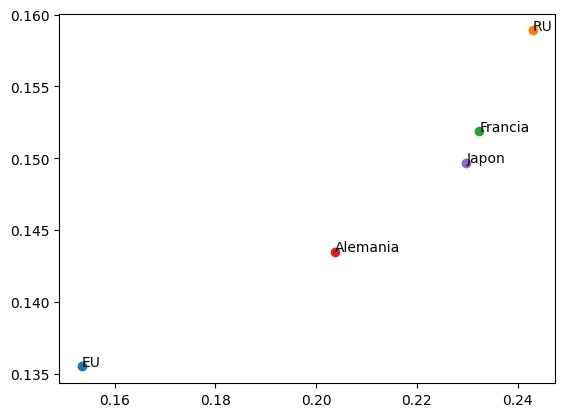

In [ ]:
# Grafique  la volatilidad y el rendiiento esperado de cada país
paises = annual_ret_summ.keys()
for i in paises:
    plt.scatter(annual_ret_summ[i]["Volatilidad"], annual_ret_summ[i]["Media"])
    plt.text(annual_ret_summ[i]["Volatilidad"], annual_ret_summ[i]["Media"], i)

In [ ]:
# Matriz de correlación
corr = pd.DataFrame(data= np.array([[1.0000, 0.5003, 0.4398, 0.3681, 0.2663],
                                    [0.5003, 1.0000, 0.5420, 0.4265, 0.3581],
                                    [0.4398, 0.5420, 1.0000, 0.6032, 0.3923],
                                    [0.3681, 0.4265, 0.6032, 1.0000, 0.3663],
                                    [0.2663, 0.3581, 0.3923, 0.3663, 1.0000]]),
                    columns=annual_ret_summ.columns, index=annual_ret_summ.columns)
corr.round(4)

,EU,RU,Francia,Alemania,Japon
EU,1.0000,0.5003,0.4398,0.3681,0.2663
RU,0.5003,1.0000,0.5420,0.4265,0.3581
Francia,0.4398,0.5420,1.0000,0.6032,0.3923
Alemania,0.3681,0.4265,0.6032,1.0000,0.3663
Japon,0.2663,0.3581,0.3923,0.3663,1.0000


¿Qué se puede observar acerca de la matriz de correlación?

- Los índices con mayor correlación son: Francia y Alemania.
- Los índices con menor correlación son: Japón y Estados Unidos.

# Matriz de correlación a partir de volatilidad y matriz de correlación

**Varianza**

$$
\sigma_p^2 = \sum_{i=1}^{n} \sum_{k=1}^{n} w_i w_k \sigma_{ik} = w^T \Sigma w
$$


**Pasa lo mismo para sacar la covarianza a partir de la correlación**
$$\sigma_{i,j} = \sigma_i \sigma_j \rho_{ij} $$

$$\Sigma = Diag(sigma)^T * Correlation * Diag(sigma) $$

In [ ]:
# Crear matriz diagonal con la info de las volatilidades individuales, tipo float
S = np.diag(annual_ret_summ.loc["Volatilidad"]).astype(float)
S

array([[0.1535, 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.243 , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.2324, 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.2038, 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.2298]])

In [ ]:
# A partir de la matriz anterior y la matriz de correlación:
sigma = S.dot(corr).dot(S)
sigma

array([[0.02356225, 0.01866144, 0.01568916, 0.01151538, 0.00939355],
       [0.01866144, 0.059049  , 0.03060847, 0.02112173, 0.01999681],
       [0.01568916, 0.03060847, 0.05400976, 0.02856943, 0.02095099],
       [0.01151538, 0.02112173, 0.02856943, 0.04153444, 0.01715502],
       [0.00939355, 0.01999681, 0.02095099, 0.01715502, 0.05280804]])

### Nos enfocaremos entonces únicamente en dos mercados: EU y Japón

- ¿Cómo construiríamos un portafolio que consiste de los mercados de acciones de EU y Japón?
- ¿Cuáles serían las posibles combinaciones?

#### 1. Supongamos que $w$ es la participación del mercado de EU en nuestro portafolio.
- ¿Cuál es la participación del mercado de Japón entonces?: $1-w$

- Luego, nuestras fórmulas de rendimiento esperado y varianza de portafolios son:

$$E[r_p]=wE[r_{EU}]+(1-w)E[r_J]$$

$$\sigma_p^2=w^2\sigma_{EU}^2+(1-w)^2\sigma_J^2+2w(1-w)\sigma_{EU,J}$$

#### 2. Con lo anterior...
- podemos variar $w$ con pasos pequeños entre $0$ y $1$, y
- calcular el rendimiento esperado y volatilidad para cada valor de $w$.

In [ ]:
# Vector de w variando entre 0 y 1 con N pasos
N = 101
w = np.linspace(0, 1, N)

# Rendimientos esperados individuales
# Activo1: EU, Activo2: Japon

# Rendimientos esperados individuales
e_us = annual_ret_summ["EU"]["Media"]
e_jp = annual_ret_summ["Japon"]["Media"]

# Volatilidades individuales
vol_us = annual_ret_summ["EU"]["Volatilidad"]
vol_jp = annual_ret_summ["Japon"]["Volatilidad"]

# Correlacion
corr_us_jp = corr["EU"]["Japon"]

# Covarianza
covariance_us_jp = corr_us_jp * vol_us * vol_jp

$$
\rho_{ij} = \frac{\sigma_{ij}}{\sigma_i \sigma_j} \Rightarrow \sigma_{ij} = \sigma_i \sigma_j \rho_{ij}
$$

In [ ]:
# Crear un DataFrame cuyas columnas sean rendimiento esperado
# y volatilidad del portafolio para cada una de las w
# generadas
portafolios2 = pd.DataFrame({
    'w_us': w,
    'w_jp': 1 -w,
    'media': w*e_us + (1-w)*e_jp,
    'vol': (w**2 * vol_us**2 + (1-w)**2 * vol_jp**2 + 2*w*(1-w)*covariance_us_jp)**(1/2)

})


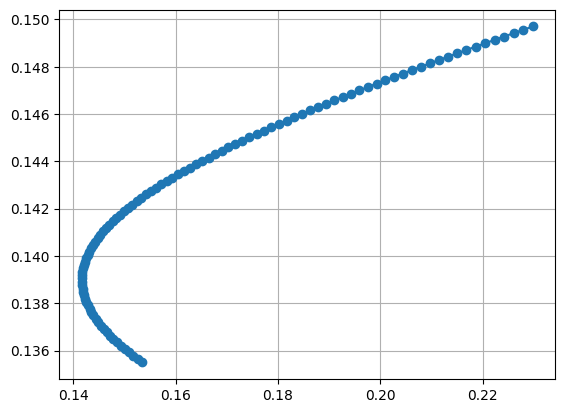

In [ ]:
### Grafica resultados
plt.plot(portafolios2.vol, portafolios2.media, marker="o")
plt.grid()

#### 3. Finalmente,
- cada una de las combinaciones las podemos graficar en el espacio de rendimiento esperado (eje $y$) contra volatilidad (eje $x$).

In [ ]:
# Crea un DF para los que tienen 100% en caa uno
one_portafolio_us = portafolios2.query("w_us == 1")
one_portafolio_jp = portafolios2.query("w_us == 0")

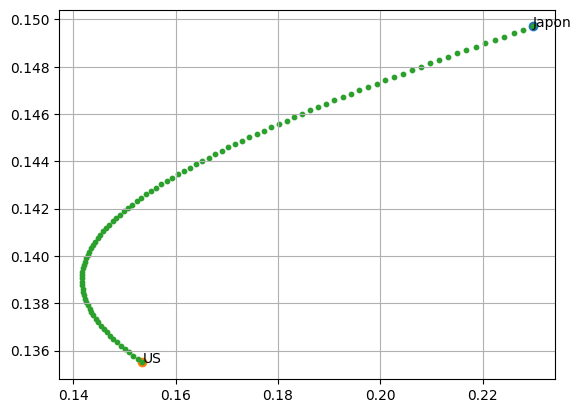

In [ ]:
# Grafica todo

# 100% Japon
plt.scatter(one_portafolio_jp.vol, one_portafolio_jp.media)
plt.text(one_portafolio_jp.vol, one_portafolio_jp.media, "Japon")

# 100% USA
plt.scatter(one_portafolio_us.vol, one_portafolio_us.media)
plt.text(one_portafolio_us.vol, one_portafolio_us.media, "US")

# Mezclando
plt.scatter(portafolios2.vol, portafolios2.media, s=10)

plt.grid()

#### De la gráfica,
1. Ver casos extremos.
2. ¿Conviene invertir 100% en el mercado de EU? ¿Porqué?
3. ¿Porqué ocurre esto?
4. Definición: frontera de mínima varianza. Caso particular: dos activos.
5. Definición: portafolio de varianza mínima.
6. Definición: portafolios eficientes.

#### 1. Definición (frontera de mínima varianza): es el lugar geométrico de los portafolios en el espacio de rendimiento esperado contra volatilidad, que para cada nivel de rendimiento esperado provee la menor varianza (volatilidad). Para dos activos, la frontera de mínima varianza son, simplemente, todos los posibles portafolios que se pueden formar con esos dos activos.


#### 2. Definición (portafolio de mínima varianza): es el portafolio que posee la menor varianza. No podemos encontrar ningún portafolio más a la izquierda de éste, en el espacio de rendimiento esperado contra volatilidad.


#### 3. Definición (portafolios eficientes): son los portafolios que están en la parte superior de la frontera de mínima varianza, partiendo desde el portafolio de mínima varianza.

___


## 2. ¿Cómo hallar el portafolio de varianza mínima?

## Obteniendo el punto de mínima varianza de un portafolio


En vase a las definicones de la clase, sabemos que la varianza de un portafolio de dos activos $(a,b)$ es igual a:

$$\sigma^2_p = w_a^2 \sigma^2_a + w_b^2 \sigma_{b}^2 + 2 w_a w_b \rho_{ab} \sigma_a\sigma_{b} $$


Dado que son dos activos, esto se puede reescribir como:
$$\sigma^2_p = w_a^2 \sigma_{a}^2  + (1 - w_a)^2 \sigma_{b}^2 + 2 w_a (1-w_a) \rho_{ab} \sigma_a\sigma_{b} $$

***¿Cómo puedo obtener el punto donde tenga mínima varianza?***

Formalmente:

\begin{align*}
&\min_{w}\sigma_p^2=w^2\sigma_1^2+(1-w)^2\sigma_2^2+2w(1-w)\rho_{12}\sigma_1\sigma_2\\
&\text{s.t.} \qquad 0\leq w\leq1,
\end{align*}


Dado que la varianza de un portafolio es una función cuadrática, puedo diferenciar e igualar a 0


Primero vamos a reorganizar un poco nuestra definición de varianza:
$$\sigma^2_p = w_a^2 \sigma_{a}^2 + \sigma_b^2 - 2w_a \sigma_b ^2 + w_a^2 \sigma_b ^2 - 2w_a \sigma_a \sigma_b \rho_{ab} - 2 w_a^2 \sigma_a \sigma_b \rho_{ab}$$


Ahora si vamos a derivar:

$$ \frac{d}{d_{wa}} \sigma^2_p  = 2w_a \sigma_a^2 - 2 \sigma_b^2 + 2w_a \sigma_b ^2 + 2 \sigma_a \sigma_b \rho_{ab} - 4 w_a \sigma_a \sigma_b \rho_{ab}$$

Igualamos a 0 para encontrar el punto con menor pendiente:

$$ 0 = 2w_a \sigma_a^2 - 2 \sigma_b^2 + 2w_a \sigma_b ^2 + 2 \sigma_a \sigma_b \rho_{ab} - 4 w_a \sigma_a \sigma_b \rho_{ab}$$

Dividimos todo entre 2:
$$ 0 = w_a \sigma_a^2 -  \sigma_b^2 + w_a \sigma_b ^2 +  \sigma_a \sigma_b \rho_{ab} - 2 w_a \sigma_a \sigma_b \rho_{ab}$$

Pasamos los que no tienen 0 al  otro lado:
$$ \sigma_b^2  - \sigma_a \sigma_b \rho_{ab} = w_a \sigma_a^2  + w_a \sigma_b ^2  - 2 w_a \sigma_a \sigma_b \rho_{ab}$$


Agrupamos $w_a$
$$ \sigma_b^2  - \sigma_a \sigma_b \rho_{ab} = [w_a (\sigma_a ^2 + \sigma_b 2)] - [2 w_a \sigma_a \sigma_b \rho_{ab}]$$

$$ \sigma_b^2  - \sigma_a \sigma_b \rho_{ab} = w_a ( [\sigma_a ^2 + \sigma_b 2] - [2\sigma_a \sigma_b \rho_{ab}])$$

Finalmente nos queda que:

$$w_a = \frac{\sigma_b^2 - \sigma_a \sigma_b \rho_{ab}}{\sigma_a^2 + \sigma_b^2 - 2 \sigma_a \sigma_b \rho_{ab}}$$

Esto igualmente se puede ecribir como:
$$w_a = \frac{\sigma_b^2 - cov(a,b)}{\sigma_a^2 + \sigma_b^2 - 2 cov(a,b)}$$

Debido a que:

$$\rho_{ab}=\rho_{ab}=\frac{\sigma_{ab}}{\sigma_a\sigma_{b}}.$$

Quiere decir que, si tengo un portafilo de activos $(a,b)$ y quiero obtener los pesos $(w_a, w_b)$ que me den mínima varianza, puedo hacer esto:

$$w_a = \frac{\sigma_b^2 - cov(a,b)}{\sigma_a^2 + \sigma_b^2 - 2 cov(a,b)}$$

$$w_b = 1 - w_a$$



In [ ]:
# Calcular la mínima varianza
w_min_var_usa = (vol_jp**2 - covariance_us_jp) / (vol_us**2 + vol_jp**2 - 2*covariance_us_jp)
w_min_var_jp = 1 - w_min_var_usa
w_min_var_usa, w_min_var_jp

(0.7539437814084219, 0.2460562185915781)

**Conclusiones:**
- Para obtener el portafolio de mínima varianza, deberíamos invertir aproximadamente el 75.40% en el índice de EU, y el 24.60% restante en el índice de Japón.

### Alternativa, scipy.optimize.minimize

\begin{align*}
&\min_{w}\sigma_p^2=w^2\sigma_1^2+(1-w)^2\sigma_2^2+2w(1-w)\sigma_{12}\\
&\text{s.t.} \qquad 0\leq w\leq1,
\end{align*}


1- Creamos una función para minimizar

2- Definimos lo que quieremos optimizar (los pesos en este caso)

3- Ponemos restricciones

4- A la función a minimizar le pasamos lo que queremos optimizar (los pesos) y luego los inputs numericos ya dados

In [ ]:
from scipy.optimize import minimize
# Función objetivo
def var2(w, s1, s2, s12):
    return w**2 * s1**2 + (1 - w)**2 * s2**2 + 2 * w * (1 - w) * s12

# Solución
minvar_num = minimize(
    fun=var2,
    x0=0.1,
    args=(vol_us, vol_jp, covariance_us_jp),
    bounds=((0,1),)
)

In [ ]:
w_min_var = minvar_num["x"]

In [ ]:
# Peso del portafolio de minima varianza


In [ ]:
# Rendimiento esperado con el de minima varianza
w_min_var * e_us + (1-w_min_var) * e_jp

array([0.138994])

In [ ]:
# Volatilidad con el de minima varianza
(w_min_var**2 * vol_us**2 + (1-w_min_var)**2 * vol_jp**2 + 2*w_min_var*(1-w_min_var)*covariance_us_jp)**(1/2)

array([0.14168963])

## 3. Si tenemos 3 activos, no todas las combinaciones están en esta varianza mínima
En este caso:
- EU
- Japon
- RU



## Primero creamos un data frame

In [ ]:
# Create reandom weights
def rand_weights(n):
    k = np.random.rand(n)
    return k / sum(k)
df3 = pd.DataFrame([rand_weights(3) for i in range(1000)],
                            columns =['w1', 'w2', 'w3'])

# Pesos
w1 = df3.w1
w2 = df3.w2
w3 = df3.w3

# volatilidades
vol1 = annual_ret_summ['EU'].loc['Volatilidad']
vol2 = annual_ret_summ['Japon'].loc['Volatilidad']
vol3 = annual_ret_summ['RU'].loc['Volatilidad']

# Covarianzas
cov12 = corr["EU"]["Japon"]*vol1*vol2
cov13 = corr["EU"]["RU"]*vol1*vol3
cov23 = corr["Japon"]["RU"]*vol2*vol3

# Valores esperados
e1 = annual_ret_summ['EU'].loc['Media']
e2 = annual_ret_summ['Japon'].loc['Media']
e3 = annual_ret_summ['RU'].loc['Media']


# Crea un portafolio con pesos ranodom
portafolios3 = pd.DataFrame({
    'w1': w1,
    'w2': w2,
    'w3': w3,
    'media': w1*e1 + w2*e2 + w3*e3,
    'volatilidad': (w1**2 * vol1**2 +
                    w2**2 * vol2**2 +
                    w3**2 * vol3**2 +
                    2*w1*w2*cov12 +
                    2*w1*w3*cov13 +
                    2*w2*w3*cov23)**(1/2)
})



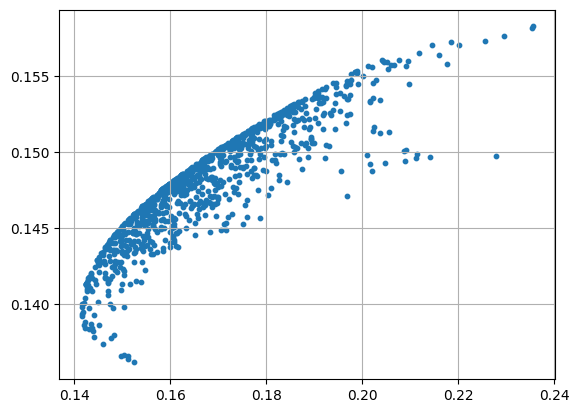

In [ ]:
# Grafica los portafolios
plt.scatter(portafolios3.volatilidad, portafolios3.media, s=10)
plt.grid()

La búsqueda del portafolio de varianza mínima corresponde a la solución del siguiente problema de optimización:

- Para un portafolio con $n$ activos ($\boldsymbol{w}=[w_1,\dots,w_n]^T\in\mathbb{R}^n$):
\begin{align*}
&\min_{\boldsymbol{w}} & \sigma_p^2=\boldsymbol{w}^T\Sigma\boldsymbol{w}\\
&\text{s.t.} \qquad & \boldsymbol{w}\geq0,\\
& & w_1+\dots+w_n=1
\\
& & E[p] = \mu
\end{align*}
donde $\Sigma$ es la matriz de varianza-covarianza de los rendimientos de los $n$ activos.

## Ejemplo: ¿Cuál es el mejor portafolio para un rendimiento de 14%?

In [ ]:
# volatilidades
s1 = annual_ret_summ['EU'].loc['Volatilidad']
s2 = annual_ret_summ['Japon'].loc['Volatilidad']
s3 = annual_ret_summ['RU'].loc['Volatilidad']

# Covarianzas
s12 = corr['EU']['Japon']*vol1*vol2
s13 = corr['EU']['RU']*vol1 * vol3
s23 = corr['RU']['Japon']*vol3*vol2

In [ ]:
## Construcción de parámetros
## Activo 1: EU, Activo 2: Japon, Activo 3: RU

# 1. Sigma: matriz de varianza-covarianza
sigma = np.array([[s1**2, s12, s13],
                  [s12, s2**2, s23],
                  [s13, s23, s3**2]])

# 2. rendimientos esperados activos individuales
eind = np.array([e1, e2, e3])

In [ ]:
# Lo que quiero minimizar
def varianza(w, sigma):
    return w.T.dot(sigma).dot(w)

# Restricciones, quiero un rendimiento iguial a mu_req
def rendimiento_req(w, Eind, mu_req):
    return w.T.dot(Eind) - mu_req

# Pesos tiene que sumar 1
def weights_equal_1(w):
    return np.sum(w) - 1


cons = (
    # Rendimiento requerido
    {'type': 'eq', 'fun': rendimiento_req, 'args': (eind, 0.14)},
    # Los pesos tienne que ser 1
    {'type': 'eq', 'fun': weights_equal_1}
)
# Portafolio de mínima varianza para nivel de rendimiento esperado Ereq[i]
min_var = minimize(fun=varianza,
                   x0=np.array([1/3, 1/3, 1/3]),
                   args=(sigma,),
                   bounds=((0,1), (0,1), (0,1)),
                   constraints=cons)


In [ ]:
# ¿Como quedaría la ponderacion?
min_var["x"]

array([0.71197345, 0.24345883, 0.04456772])

### Quiero el mejor portafolio posible para cada uno de los rendimientos

In [ ]:
# DataFrame de portafolios de la frontera
portfolios3 = pd.DataFrame(index=range(N), columns=['w1', 'w2', 'w3', 'media', 'vol'])

In [ ]:
ereq = np.linspace(eind.min(), eind.max(), N)

In [ ]:
# Número de portafolios
N = 100
ereq = np.linspace(eind.min(), eind.max(), N)

# Para cada rendimiento entre el mínimo y máximo posible ... ¿cuáles son los pesoso con mínima varianza?
for i in range(len(ereq)):
    # Restricciones
    cons = (
        # Rendimiento requerido
        {'type': 'eq', 'fun': rendimiento_req, 'args': (eind, ereq[i])},
        # Los pesos tienne que ser 1
        {'type': 'eq', 'fun': weights_equal_1}
    )
    # Portafolio de mínima varianza para nivel de rendimiento esperado Ereq[i]
    min_var = minimize(fun=varianza,
                       x0=np.array([1/3, 1/3, 1/3]),
                       args=(sigma,),
                       bounds=((0,1), (0,1), (0,1)),
                       constraints=cons
                      )
    # Pesos, rendimientos y volatilidades de los portafolio
    portfolios3.loc[i, ['w1','w2','w3']] = min_var.x
    portfolios3['media'][i] = eind.dot(min_var.x)
    portfolios3['vol'][i] = np.sqrt(varianza(min_var.x, sigma))

In [ ]:
# Portafolios de la frontera
portfolios3

,w1,w2,w3,media,vol
0,1.0,0.0,0.0,0.1355,0.1535
1,0.983355,0.016645,0.0,0.135736,0.152008
2,0.966709,0.033291,0.0,0.135973,0.150608
3,0.950064,0.049936,0.0,0.136209,0.149301
4,0.933419,0.066581,0.0,0.136445,0.14809
...,...,...,...,...,...
96,0.0,0.077075,0.922925,0.158191,0.231206
97,0.0,0.051383,0.948617,0.158427,0.235001
98,0.0,0.025692,0.974308,0.158664,0.238935
99,0.0,0.0,1.0,0.1589,0.243


### Portafolio de varianza mínima

En este caso, es algo muy similar pero no tenemos que hacer ningún loop y no hay restricción de rendimiento esperado

In [ ]:
# Portafolio de mínima varianza
cons = ({'type': 'eq', 'fun': weights_equal_1},)
min_var3 = minimize(varianza,
                    x0=np.array([1/3, 1/3, 1/3]),
                    args=(sigma,),
                    bounds=((0,1), (0,1), (0,1)),
                    constraints=cons)
min_var3

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.020047269582720753
       x: [ 7.346e-01  2.389e-01  2.641e-02]
     nit: 7
     jac: [ 4.009e-02  4.009e-02  4.009e-02]
    nfev: 28
    njev: 7

In [ ]:
w_minvar3 = min_var3.x
e_minvar3 = eind.dot(w_minvar3)
s_minvar3 = np.sqrt(varianza(w_minvar3, sigma))

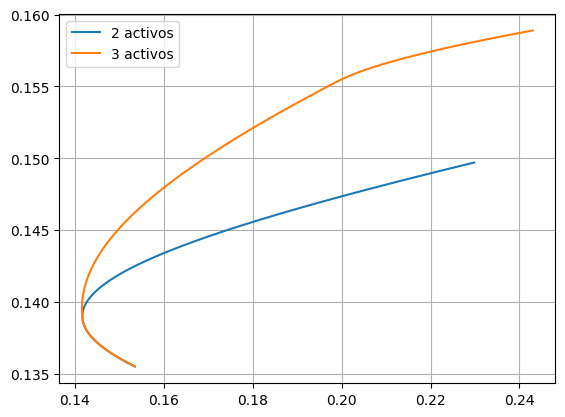

In [ ]:
# Grafica ambos portafolios, ¿que concluyes?
plt.plot(portafolios2.vol, portafolios2.media, label="2 activos")
plt.plot(portfolios3.vol, portfolios3.media, label="3 activos")
plt.legend()
plt.grid()

**Conclusión.** Mayor diversificación.


## 4. Comentarios acerca de la Teoría Moderna de Portafolios.

- Todo lo anterior es un abrebocas de lo que llamamos análisis de media-varianza, y que es la base de la teoría moderna de portafolios.
- El análisis de media-varianza transformó el mundo de las inversiones cuando fué presentada por primera vez.
- Claro, tiene ciertas limitaciones, pero se mantiene como una de las ideas principales en la selección óptima de portafolios.

### Historia.

1. Fue presentada por primera vez por Harry Markowitz en 1950. Acá su [artículo](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=1&ved=2ahUKEwjd0cOTx8XdAhUVo4MKHcLoBhcQFjAAegQICBAC&url=https%3A%2F%2Fwww.math.ust.hk%2F~maykwok%2Fcourses%2Fma362%2F07F%2Fmarkowitz_JF.pdf&usg=AOvVaw3d29hQoNJVqXvC8zPuixYG).
2. Era un joven estudiante de Doctorado en la Universidad de Chicago.
3. Publicó su tesis doctoral en selección de portafolios en "Journal of Finance" en 1952.
4. Su contribución transformó por completo la forma en la que entendemos el riesgo.
5. Básicamente obtuvo una teoría que analiza como los inversionistas deberían escoger de manera óptima sus portafolios, en otras palabras, cómo distribuir la riqueza de manera óptima en diferentes activos.
6. Casi 40 años después, Markowitz ganó el Premio Nobel en economía por esta idea.

- En el siguiente módulo revisaremos cómo elegir portafolios óptimos como si los inversionistas sólo se preocuparan por medias y varianzas.
- ¿Qué pasa si un inversionista también se preocupa por otros momentos (asimetría, curtosis...)?
- La belleza del análisis media-varianza es que cuando combinamos activos correlacionados imperfectamente, las varianzas siempre decrecen (no sabemos que pasa con otras medidas de riesgo).
- Si a un inversionista le preocupan otras medidas de riesgo, el análisis media-varianza no es el camino.

- Además, si eres una persona que le gusta el riesgo: quieres encontrar la próxima compañía top que apenas va arrancando (como Google en los 2000) e invertir todo en ella para generar ganancias extraordinarias; entonces la diversificación no es tampoco el camino.
- La diversificación, por definición, elimina el riesgo idiosincrático (de cada compañía), y por tanto elimina estos rendimientos altísimos que brindaría un portafolio altamente concentrado.